<a href="https://colab.research.google.com/github/kriti5/ai-ml/blob/main/classification/naiveBayes_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Naive bayes
from sklearn.datasets import load_iris
import pandas as pd

In [5]:
iris_bunch = load_iris()

In [6]:
data = pd.DataFrame(iris_bunch.data, columns = iris_bunch.feature_names)

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
print(iris_bunch)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [11]:
data['class'] = iris_bunch.target
#class is a reserved keyword, so can't be used with `.` operator

In [12]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


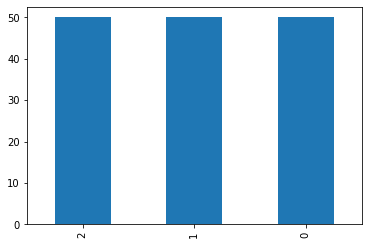

In [13]:
data['class'].value_counts().plot.bar()

In [14]:
#So it's a balanced dataset

In [15]:
data.isnull().sum()
#no null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [16]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

In [17]:
features = data.drop('class', axis =1) #inplace shoudn't be used here, as we are only trying to extract out features
label = data['class']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state =5)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_test_pred = gnb.predict(x_test)
y_train_pred = gnb.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Accuracy for train model is ", train_accuracy)

test_accuracy = accuracy_score(y_test_pred, y_test)
print("Accuracy for test model is ", test_accuracy)

Accuracy for train model is  0.975
Accuracy for test model is  0.9


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

